# Exploring Electric Vehicle Adoption in Washington State: A Data Analysis Project

## Introduction:

Electric vehicles (EVs) have emerged as a promising solution to reduce greenhouse gas emissions and dependence on fossil fuels in the transportation sector. Washington State has been actively promoting the adoption of electric vehicles through various incentives and policies. In this data analysis project, i am aiming to explore the patterns and trends in the population of `Battery Electric Vehicles (BEVs)` and `Plug-in Hybrid Electric Vehicles (PHEVs)` registered through the Washington State Department of Licensing (DOL). By analyzing this dataset, i seek to gain insights into the current status of EV adoption, geographic distribution, key factors influencing adoption, and potential areas for further promotion.
The data used in this analysis was sourced from the United States government's open data website, [Data.gov](https://catalog.data.gov/dataset?q=&sort=views_recent+desc) Here is the link to this specific data set, [Electric Vehicle Population Data](https://catalog.data.gov/dataset/electric-vehicle-population-data)
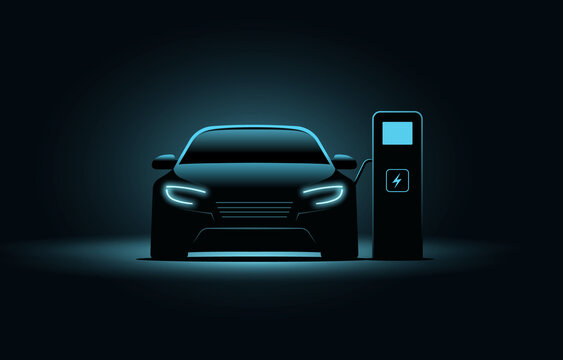

## Dataset Overview:
The dataset comprises several key columns providing information about each registered electric vehicle, including `VIN (Vehicle Identification Number)`, `County`, `City`, `State`, `Postal Code`, `Model Year`, `Make`, `Model`, `Electric Vehicle Type`, `Clean Alternative Fuel Vehicle (CAFV) Eligibility`, `Electric Range`, `Base MSRP`, `Legislative District`, `DOL Vehicle ID`, `Vehicle Location`,` Electric Utility`, and `2020 Census Tract`.

## Project Objectives:

- Analyze the distribution of electric vehicles across different counties.
- Assess the impact of clean alternative fuel vehicle eligibility on electric vehicle adoption.
- Identify potential opportunities for policy interventions or incentives to further promote electric vehicle adoption in specific regions or demographics.

## Methodology:

1. Data Cleaning and Preprocessing: I will clean the dataset by handling missing values, and standardizing data formats.
2. Exploratory Data Analysis (EDA): I will perform descriptive statistics, visualizations, and geographic mapping to understand the distribution and characteristics of electric vehicles in Washington State.


## Expected Outcomes:
By the end of this project, I anticipate gaining a comprehensive understanding of the current landscape of electric vehicle adoption in Washington State.  findings can potentially inform policymakers, urban planners, and stakeholders in the transportation sector to develop targeted strategies for accelerating the transition to electric mobility and achieving sustainability goals.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.style as style
import geopandas as gpd
style.use('ggplot')
from shapely.geometry import Point, Polygon
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
# columns in the data
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [4]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


### Data Cleaning

In [5]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

Some columns in the dataset are not relevant in this analysis, so i will remove those columns from further analysis. those columns that i am going to remove are:
`VIN (1-10)`, `Postal Code`, `Electric Range`, `Base MSRP`, `Legislative District`, `DOL Vehicle ID`, `Vehicle Location`, `2020 Census Tract`

In [6]:
ev_data_pop = ev_data.drop(columns = ['VIN (1-10)', 'Postal Code', 'Electric Range', 'Base MSRP', 'Legislative District',
                                      'DOL Vehicle ID', 'Vehicle Location', '2020 Census Tract'], axis = 1).copy()

In [7]:
ev_data_pop.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC


In [8]:
# column names into lower case
ev_data_pop.columns = [column.lower() for column in ev_data_pop.columns]

In [9]:
ev_data_pop.head()

,county,city,state,model year,make,model,electric vehicle type,clean alternative fuel vehicle (cafv) eligibility,electric utility
0,King,Seattle,WA,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PACIFICORP
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC


In [10]:
# function to count the null values and its percentage
def null_values_count(df):
    df_null = df.isnull().sum()
    percentage = (df_null / df.shape[0]) * 100
    result = pd.concat([df_null, percentage], axis = 1, keys = ['null values', 'percentage'])
    print(result)

In [11]:
null_values_count(ev_data_pop)

                                                   null values  percentage
county                                                       3    0.001994
city                                                         3    0.001994
state                                                        0    0.000000
model year                                                   0    0.000000
make                                                         0    0.000000
model                                                        0    0.000000
electric vehicle type                                        0    0.000000
clean alternative fuel vehicle (cafv) eligibility            0    0.000000
electric utility                                             3    0.001994


The dataset contains null values in three columns: `county`, `city`, and `electric utility`. In each of these columns, only three values are missing. Given the small number of missing values, there are two straight forward approaches for handling them:

- Removal of Rows: Since the number of missing values is small and constitutes a negligible portion of the dataset, one option is to remove the rows with missing values. This approach ensures that the dataset remains largely intact while eliminating the impact of missing values on subsequent analysis. 

- Imputation with Mean or Mode: Alternatively, the missing values can be imputed with the mean (for numerical columns) or mode (for categorical columns) of the respective columns. Imputation ensures that the dataset remains complete, thereby preserving all available information.

In [12]:
# function to fill missing values
def fill_missing_values(df, column, fill_value = 'unknown'):
    df[column] = df[column].fillna(fill_value)

In [13]:
fields = ['county', 'city', 'electric utility']
for value in fields:
    fillvalue = ev_data_pop[value].mode()[0]
    print(fillvalue)
    fill_missing_values(ev_data_pop, value,fillvalue)

King
Seattle
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [14]:
null_values_count(ev_data_pop)

                                                   null values  percentage
county                                                       0         0.0
city                                                         0         0.0
state                                                        0         0.0
model year                                                   0         0.0
make                                                         0         0.0
model                                                        0         0.0
electric vehicle type                                        0         0.0
clean alternative fuel vehicle (cafv) eligibility            0         0.0
electric utility                                             0         0.0


In [15]:
ev_data_pop['state'].value_counts() / len(ev_data_pop) * 100

state
WA    99.773395
CA     0.061137
VA     0.023259
MD     0.021930
TX     0.013291
NC     0.008639
IL     0.007974
AZ     0.007310
CO     0.007310
FL     0.005981
NJ     0.005981
HI     0.005316
OR     0.005316
NY     0.004652
CT     0.004652
SC     0.003987
NV     0.003987
GA     0.003323
DC     0.003323
MO     0.002658
MA     0.001994
NE     0.001994
LA     0.001994
KY     0.001994
AL     0.001994
WY     0.001329
KS     0.001329
OH     0.001329
IN     0.001329
BC     0.001329
AR     0.001329
ID     0.001329
UT     0.001329
PA     0.001329
AP     0.000665
AK     0.000665
MS     0.000665
NH     0.000665
DE     0.000665
MT     0.000665
MN     0.000665
Name: count, dtype: float64

Emphasizing my analysis on electric vehicles (EVs) registered in `Washington (WA)` brings a sharper focus to the dataset, as an overwhelming `99.7%` of the vehicles originate from this state.

In [16]:
ev_data_pop = ev_data_pop[ev_data_pop['state'] == 'WA'].copy()
ev_data_pop['make & model'] = ev_data_pop['make'] + " " + ev_data_pop['model'] # new column by comnbining maker and model column

### Analysis

In [17]:
# draw pretty table
def create_pretty_table(series, headers = [0,1,2]):
    print(series.to_markdown(headers = headers, tablefmt='pretty'))
    
# calculate percentage
def calculate_percentage(series, df):
    data = round((series/len(df)) * 100, 1)
    data = pd.concat([series, data], axis = 1, keys = ['value', 'percentage(%)'])
    return data

#### Model Year Analysis
##### Distribution of EV registrations by model year

In [18]:
model_year_1997_2023 = ev_data_pop['model year'].value_counts().sort_index()
model_year_1997_2023_table = calculate_percentage(model_year_1997_2023, ev_data_pop)
create_pretty_table(model_year_1997_2023_table, ['Year', 'Count', 'Percentage'])

+------+---------+------------+
| Year |  Count  | Percentage |
+------+---------+------------+
| 1997 |   1.0   |    0.0     |
| 1998 |   1.0   |    0.0     |
| 1999 |   4.0   |    0.0     |
| 2000 |   8.0   |    0.0     |
| 2002 |   2.0   |    0.0     |
| 2003 |   1.0   |    0.0     |
| 2008 |  18.0   |    0.0     |
| 2010 |  24.0   |    0.0     |
| 2011 |  795.0  |    0.5     |
| 2012 | 1630.0  |    1.1     |
| 2013 | 4555.0  |    3.0     |
| 2014 | 3598.0  |    2.4     |
| 2015 | 4919.0  |    3.3     |
| 2016 | 5632.0  |    3.8     |
| 2017 | 8552.0  |    5.7     |
| 2018 | 14407.0 |    9.6     |
| 2019 | 10693.0 |    7.1     |
| 2020 | 11263.0 |    7.5     |
| 2021 | 18610.0 |    12.4    |
| 2022 | 27734.0 |    18.5    |
| 2023 | 37052.0 |    24.7    |
| 2024 |  642.0  |    0.4     |
+------+---------+------------+


In [19]:
# highlight the purchase
starting = model_year_1997_2023[(model_year_1997_2023.index >= 1997) & (model_year_1997_2023.index <= 2010)]
small_rise = model_year_1997_2023[(model_year_1997_2023.index >= 2010) & (model_year_1997_2023.index <= 2019)]
higher_sales = model_year_1997_2023[(model_year_1997_2023.index >= 2019) & (model_year_1997_2023.index <= 2023)]

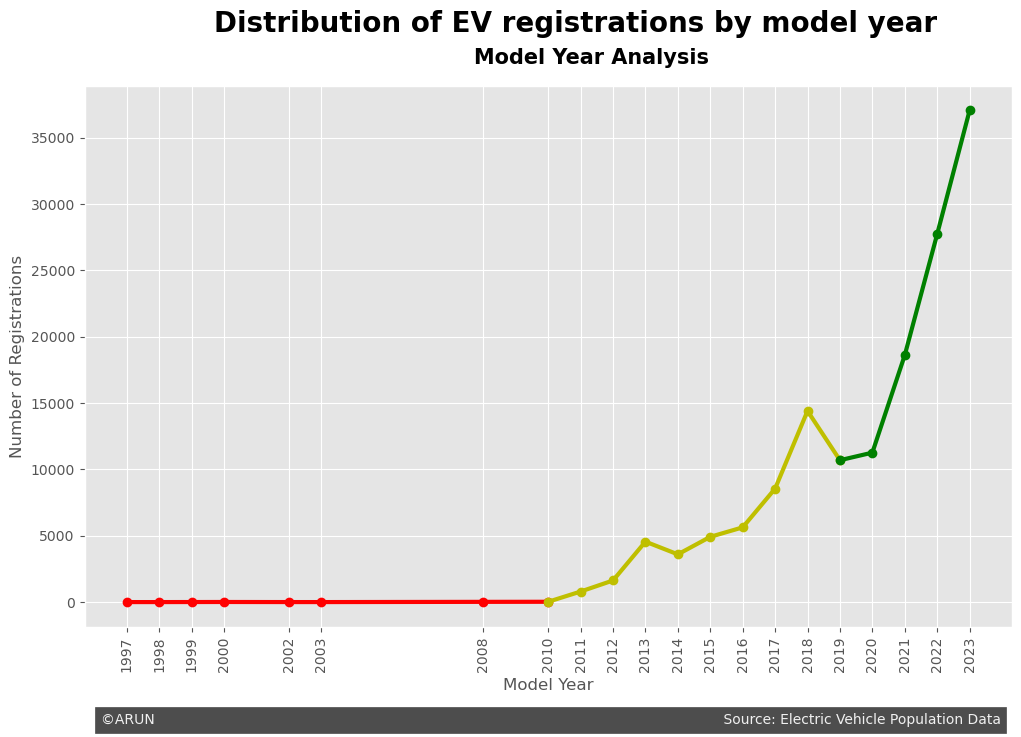

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.tight_layout()
only_97_to_23 = model_year_1997_2023.drop(2024) 
years = only_97_to_23.index.astype(int)  
values = only_97_to_23.values

ax.set_xticks(years)  
ax.set_xticklabels([f'{year}' for year in years], rotation=90)
ax.plot(years, values, color='b', linewidth=1)
ax.plot(starting.index, starting, color = 'r', marker='o', linewidth=3)
ax.plot(small_rise.index, small_rise, color = 'y', marker='o', linewidth=3)
ax.plot(higher_sales.index, higher_sales, color = 'g', marker='o', linewidth=3)
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

# Calculate the positions for the text labels
x_text = x_limits[0] + (x_limits[1] - x_limits[0]) * 0.14  
y_text1 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.10  
y_text2 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.04 
bottom_y = y_limits[0] - (y_limits[1] - y_limits[0]) * 0.18 



ax.text(x=x_text, y=y_text1, s="Distribution of EV registrations by model year",
        weight='bold', size=20)
ax.text(x=x_text + 8, y=y_text2, s="Model Year Analysis",
        weight='bold', size=15)
ax.text(x=x_limits[0] + 0.5, y=bottom_y, s='©ARUN' + ' ' * 130 + 'Source: Electric Vehicle Population Data', color='#f0f0f0', 
        backgroundcolor='#4d4d4d', size=10)

plt.show()


The line chart illustrates the distribution of Electric Vehicle (EV) registrations by model year. Each point on the line represents the number of EV registrations for a specific year, ranging from 1997 to 2023. Over this period, there's a discernible upward trend in EV registrations, indicating a growing adoption of electric vehicles in the market.

##### The chart reveals several key insights:

- The number of EV registrations has significantly increased over the years, with a notable acceleration in recent years.
- Beginning around 2011, there is a noticeable inflection point where EV registrations start to climb rapidly, suggesting a tipping point in consumer acceptance and adoption of electric vehicles.
- The most recent data points, particularly from 2020 to 2023, show a steep upward trajectory, indicating a surge in EV adoption and market penetration.

#### Distribution of Electric Vehicle Types

In [21]:
ev_type = ev_data_pop['electric vehicle type'].value_counts()
dat_to_pretty =  calculate_percentage(ev_type, ev_data_pop)
create_pretty_table(dat_to_pretty, headers = ['Type', 'Count', 'Percentage(%)'])


+----------------------------------------+----------+---------------+
|                  Type                  |  Count   | Percentage(%) |
+----------------------------------------+----------+---------------+
|     Battery Electric Vehicle (BEV)     | 116585.0 |     77.7      |
| Plug-in Hybrid Electric Vehicle (PHEV) | 33556.0  |     22.3      |
+----------------------------------------+----------+---------------+


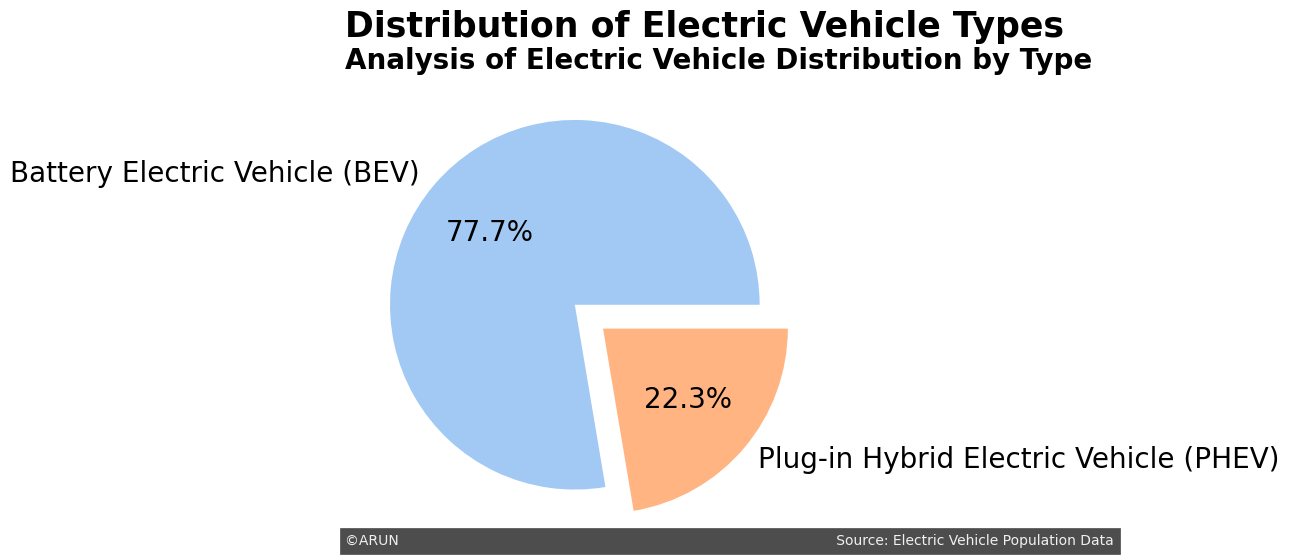

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
palette = "pastel"
colors = sns.color_palette(palette)
ax.pie(ev_type, labels=ev_type.index, explode = [0, 0.2], autopct='%1.1f%%',colors=colors, textprops={'fontsize': 20})

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

# Calculate the positions for the text labels
x_text = x_limits[0] + (x_limits[1] - x_limits[0]) * 0.003  
y_text1 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.08
y_text2 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.01 
bottom_y = y_limits[0] - (y_limits[1] - y_limits[0]) * 0.02 


ax.text(x = x_text, y = y_text1, s = 'Distribution of Electric Vehicle Types', weight = 'bold', size = 25)
ax.text(x = x_text , y = y_text2, s = 'Analysis of Electric Vehicle Distribution by Type', size=20,  weight='bold')
ax.text(x=x_text, y=bottom_y, s='©ARUN' + ' ' * 100 + 'Source: Electric Vehicle Population Data', color='#f0f0f0', 
        backgroundcolor='#4d4d4d', size=10)
plt.show()


The pie chart illustrates the distribution of Electric Vehicle (EV) registrations by type. The data is segmented into two categories: Battery Electric Vehicle (BEV) and Plug-in Hybrid Electric Vehicle (PHEV).

##### Key insights from the pie chart:

- Battery Electric Vehicles (BEVs) dominate the EV market, constituting approximately 77.7% of total registrations.
- Plug-in Hybrid Electric Vehicles (PHEVs) account for the remaining 22.3% of registrations.
- The dominance of BEVs suggests a strong preference for all-electric vehicles among consumers, possibly driven by factors such as environmental consciousness, technological advancements in battery technology, and increasing availability of charging infrastructure.
- While PHEVs represent a smaller portion of the market, their presence indicates a continued interest in hybrid models that offer both electric and gasoline-powered capabilities, appealing to consumers seeking flexibility in their driving options.

#### clean alternative fuel vehicle (cafv) eligibility

In [23]:
data = ev_data_pop['clean alternative fuel vehicle (cafv) eligibility'].value_counts()
dat_to_pretty =  calculate_percentage(data, ev_data_pop)
create_pretty_table(dat_to_pretty, headers = ['Type', 'Count', 'Percentage(%)'])

+--------------------------------------------------------------+---------+---------------+
|                             Type                             |  Count  | Percentage(%) |
+--------------------------------------------------------------+---------+---------------+
| Eligibility unknown as battery range has not been researched | 69581.0 |     46.3      |
|           Clean Alternative Fuel Vehicle Eligible            | 62793.0 |     41.8      |
|            Not eligible due to low battery range             | 17767.0 |     11.8      |
+--------------------------------------------------------------+---------+---------------+


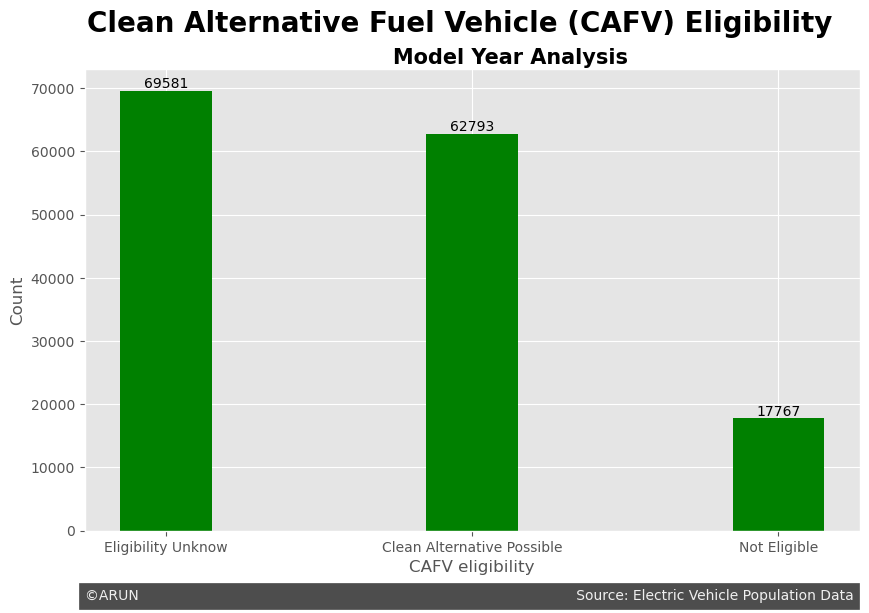

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
bar = ax.bar(data.index, data, color = 'green', width = 0.3)
xtick_values = ['Eligibility Unknow', 'Clean Alternative Possible', 'Not Eligible']

ax.set_xticklabels(v for v in xtick_values)
plt.xlabel('CAFV eligibility')
plt.ylabel('Count')
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

for bar in bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Calculate the positions for the text labels
x_text = x_limits[0] + (x_limits[1] - x_limits[0]) * 0.003  
y_text1 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.08
y_text2 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.01 
bottom_y = y_limits[0] - (y_limits[1] - y_limits[0]) * 0.15 

ax.text(x=x_text, y=y_text1, s="Clean Alternative Fuel Vehicle (CAFV) Eligibility",
        weight='bold', size=20)
ax.text(x=x_text+1 , y=y_text2, s="Model Year Analysis",
        weight='bold', size=15)
ax.text(x=x_limits[0], y= bottom_y, s='©ARUN' + ' ' * 100 + 'Source: Electric Vehicle Population Data', color='#f0f0f0', 
        backgroundcolor='#4d4d4d', size=10)

plt.show()

##### Key observations

- Eligibility Unknown as Battery Range Has Not Been Researched: This category represents 46.3% of the total. It signifies EVs for which eligibility regarding CAFV incentives or benefits is uncertain due to insufficient research or information on their battery range.

- Clean Alternative Fuel Vehicle Eligible: This category accounts for 41.8% of the total. It denotes EVs that are deemed eligible for CAFV incentives or benefits, likely due to meeting specified criteria related to clean alternative fuel vehicles, regardless of battery range.

- Not Eligible Due to Low Battery Range: This category makes up 11.8% of the total. It indicates EVs that are ineligible for CAFV incentives or benefits, primarily because their battery range falls below a threshold considered insufficient for qualification.

#### Top 10 EV Manufactures 

In [25]:
top_10_ev_makers = ev_data_pop['make'].value_counts().head(10)
tm = calculate_percentage(top_10_ev_makers,ev_data_pop)
create_pretty_table(tm, ['Manufacturer', 'Count', 'Percentage'])

+--------------+---------+------------+
| Manufacturer |  Count  | Percentage |
+--------------+---------+------------+
|    TESLA     | 68821.0 |    45.8    |
|    NISSAN    | 13481.0 |    9.0     |
|  CHEVROLET   | 12004.0 |    8.0     |
|     FORD     | 7592.0  |    5.1     |
|     BMW      | 6426.0  |    4.3     |
|     KIA      | 6187.0  |    4.1     |
|    TOYOTA    | 5196.0  |    3.5     |
|  VOLKSWAGEN  | 4064.0  |    2.7     |
|    VOLVO     | 3529.0  |    2.4     |
|     JEEP     | 3283.0  |    2.2     |
+--------------+---------+------------+


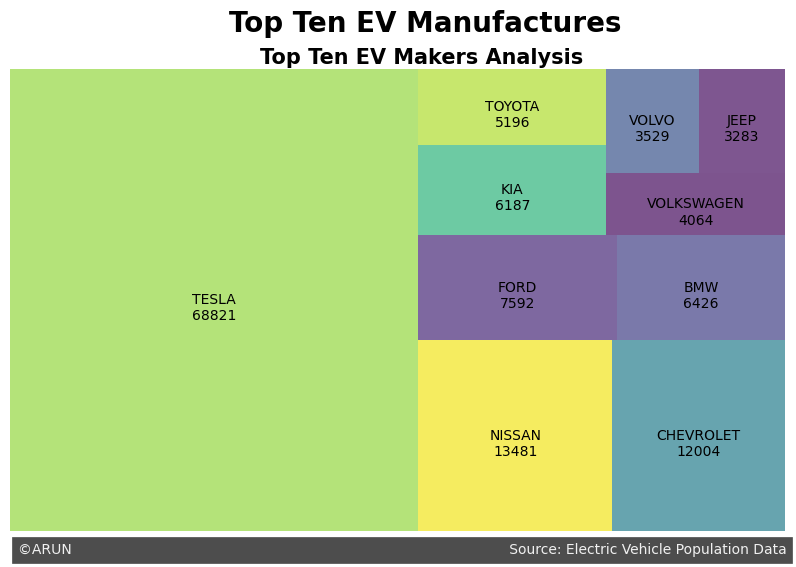

In [26]:
# Plotting the treemap
fig, ax = plt.subplots(figsize=(10, 6))
ax = squarify.plot(sizes=top_10_ev_makers.values, label=top_10_ev_makers.index, alpha=0.7)

# Add count labels to each rectangle
for i, (label, frequency) in enumerate(zip(top_10_ev_makers.index, top_10_ev_makers.values)):
    x = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
    y = ax.patches[i].get_y() + ax.patches[i].get_height() / 2
    
    # Adjust label position based on rectangle width
    if ax.patches[i].get_width() < 0.1:  # If the rectangle is narrow
        x -= 0.02  # Move the label slightly to the left
    else:
        x += 0.02  # Otherwise, move the label slightly to the right
    
    plt.text(x=x, y=y, s=f"\n\n{frequency}", horizontalalignment='center', verticalalignment='center')

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

# Calculate the positions for the text labels
x_text = x_limits[0] + (x_limits[1] - x_limits[0]) * 0.003  
y_text1 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.08
y_text2 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.01 
bottom_y = y_limits[0] - (y_limits[1] - y_limits[0]) * 0.05 

ax.text(x=x_text+28, y=y_text1, s="Top Ten EV Manufactures ",
        weight='bold', size=20)
ax.text(x=x_text+32 , y=y_text2, s="Top Ten EV Makers Analysis",
        weight='bold', size=15)
ax.text(x=x_limits[0]+ 1, y= bottom_y, s='©ARUN' + ' ' * 100 + 'Source: Electric Vehicle Population Data', color='#f0f0f0', 
        backgroundcolor='#4d4d4d', size=10)     
plt.axis('off')  
plt.show()



The treemap visually represents the distribution of electric vehicle (EV) registrations among the top 10 manufacturers. Each rectangle within the treemap corresponds to a manufacturer, with the size of the rectangle proportional to the number of registrations attributed to that manufacturer.

- TESLA: The largest rectangle in the treemap is attributed to Tesla, indicating its significant market share as the leading EV manufacturer. Tesla's dominance is visually apparent, reflecting its substantial contribution to EV registrations.

- NISSAN, CHEVROLET, FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, VOLVO, JEEP: The remaining rectangles represent other manufacturers in descending order of registrations. These rectangles vary in size based on the number of registrations each manufacturer has attained, providing a clear visual comparison of their relative market positions.


In [27]:
top_10_models = ev_data_pop['make & model'].value_counts().head(10)
tmodels = calculate_percentage(top_10_models,ev_data_pop)
create_pretty_table(tmodels, ['Manufacturer', 'Count', 'Percentage'])

+-------------------+---------+------------+
|   Manufacturer    |  Count  | Percentage |
+-------------------+---------+------------+
|   TESLA MODEL Y   | 28456.0 |    19.0    |
|   TESLA MODEL 3   | 27626.0 |    18.4    |
|    NISSAN LEAF    | 13171.0 |    8.8     |
|   TESLA MODEL S   | 7592.0  |    5.1     |
| CHEVROLET BOLT EV | 5727.0  |    3.8     |
|   TESLA MODEL X   | 5101.0  |    3.4     |
|  CHEVROLET VOLT   | 4876.0  |    3.2     |
|  VOLKSWAGEN ID.4  | 2991.0  |    2.0     |
|     KIA NIRO      | 2869.0  |    1.9     |
| CHRYSLER PACIFICA | 2626.0  |    1.7     |
+-------------------+---------+------------+


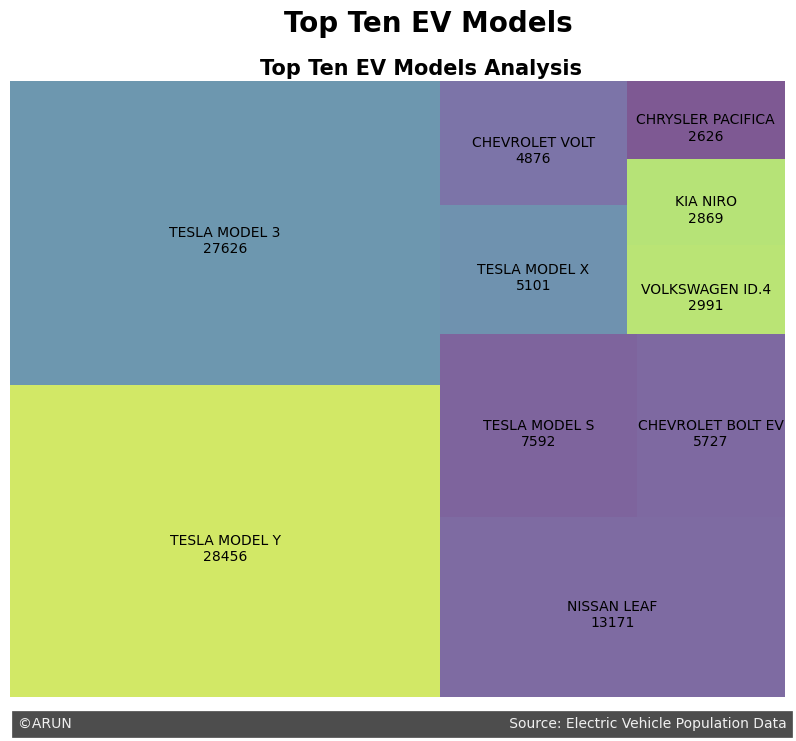

In [28]:
# Plotting the treemap
plt.figure(figsize=(10, 8))
ax = squarify.plot(sizes=top_10_models.values, label=top_10_models.index, alpha=0.7)

# Add count labels to each rectangle
for i, (label, frequency) in enumerate(zip(top_10_models.index, top_10_models.values)):
    x = ax.patches[i].get_x() + ax.patches[i].get_width() / 2
    y = ax.patches[i].get_y() + ax.patches[i].get_height() / 2
    
    # Adjust label position based on rectangle width
    if ax.patches[i].get_width() < 0.1:  # If the rectangle is narrow
        x -= 0.02  # Move the label slightly to the left
    else:
        x += 0.02  # Otherwise, move the label slightly to the right
    
    plt.text(x=x, y=y, s=f"\n\n{frequency}", horizontalalignment='center', verticalalignment='center')

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

# Calculate the positions for the text labels
x_text = x_limits[0] + (x_limits[1] - x_limits[0]) * 0.003  
y_text1 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.08
y_text2 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.01 
bottom_y = y_limits[0] - (y_limits[1] - y_limits[0]) * 0.05 

ax.text(x=x_text+35, y=y_text1, s="Top Ten EV Models ",
        weight='bold', size=20)
ax.text(x=x_text+32 , y=y_text2, s="Top Ten EV Models Analysis",
        weight='bold', size=15)
ax.text(x=x_limits[0]+ 1, y= bottom_y, s='©ARUN' + ' ' * 100 + 'Source: Electric Vehicle Population Data', color='#f0f0f0', 
        backgroundcolor='#4d4d4d', size=10)     
plt.axis('off')  
plt.show()



The treemap provides insights into the top 10 electric vehicle (EV) models based on registrations, showcasing the diversity and popularity of electric vehicles in the market.

- Tesla Model Y: Leading the pack, the Tesla Model Y commands a significant portion of EV registrations, highlighting its appeal as a versatile and efficient crossover SUV option for environmentally conscious consumers.

- Tesla Model 3: Close behind, the Tesla Model 3 solidifies its position as a market favorite, known for its combination of affordability, range, and cutting-edge technology, making sustainable driving accessible to a broader audience.

- Nissan Leaf: As a pioneer in the EV market, the Nissan Leaf continues to attract drivers with its practicality and reliability, showcasing sustained interest in mass-market electric vehicles.

- Tesla Model S: Tesla's flagship sedan, the Model S, maintains its allure with its luxurious features, impressive performance, and long-range capabilities, appealing to drivers seeking premium electric mobility.

- Chevrolet Bolt EV: The Chevrolet Bolt EV stands out for its affordability, spacious interior, and impressive electric range, offering a compelling option for budget-conscious consumers interested in all-electric driving.

- Tesla Model X: With its distinctive design and advanced features, the Tesla Model X SUV caters to drivers seeking luxury, performance, and utility in an electric vehicle, further expanding Tesla's market reach.

- Chevrolet Volt: Combining electric efficiency with the flexibility of a plug-in hybrid, the Chevrolet Volt appeals to consumers seeking a transitional solution to electric mobility, showcasing versatility in the EV market.

- Volkswagen ID.4: Volkswagen's ID.4 compact SUV represents the brand's commitment to electric mobility, offering practicality, modern design, and competitive range, appealing to a diverse range of consumers.

- Kia Niro: The Kia Niro impresses with its crossover design, efficient powertrain options, and competitive pricing, providing a compelling choice for eco-conscious drivers seeking a balance of versatility and value.

- Chrysler Pacifica: Rounding out the list, the Chrysler Pacifica Hybrid minivan combines family-friendly practicality with plug-in hybrid efficiency, catering to environmentally conscious families seeking spaciousness and fuel savings.

In [29]:
top_10_makers_name = list(top_10_ev_makers.index)
print(top_10_makers_name)

['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW', 'KIA', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'JEEP']


In [30]:
ev_data_pop_top_10 = ev_data_pop[ev_data_pop['make'].isin(top_10_makers_name)]

In [31]:
ev_data_pop_top_10.head()

,county,city,state,model year,make,model,electric vehicle type,clean alternative fuel vehicle (cafv) eligibility,electric utility,make & model
1,King,Bothell,WA,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),JEEP GRAND CHEROKEE
2,Yakima,Yakima,WA,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PACIFICORP,JEEP GRAND CHEROKEE
3,King,Kirkland,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),TESLA MODEL 3
4,Thurston,Olympia,WA,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC,BMW I3
5,Snohomish,Marysville,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC,TESLA MODEL 3


In [32]:
pivot_table = ev_data_pop_top_10.groupby(['make', 'electric vehicle type']).size().reset_index(name = 'count')
pivot_table

,make,electric vehicle type,count
0,BMW,Battery Electric Vehicle (BEV),1793
1,BMW,Plug-in Hybrid Electric Vehicle (PHEV),4633
2,CHEVROLET,Battery Electric Vehicle (BEV),7128
3,CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),4876
4,FORD,Battery Electric Vehicle (BEV),3902
5,FORD,Plug-in Hybrid Electric Vehicle (PHEV),3690
6,JEEP,Plug-in Hybrid Electric Vehicle (PHEV),3283
7,KIA,Battery Electric Vehicle (BEV),4144
8,KIA,Plug-in Hybrid Electric Vehicle (PHEV),2043
9,NISSAN,Battery Electric Vehicle (BEV),13481


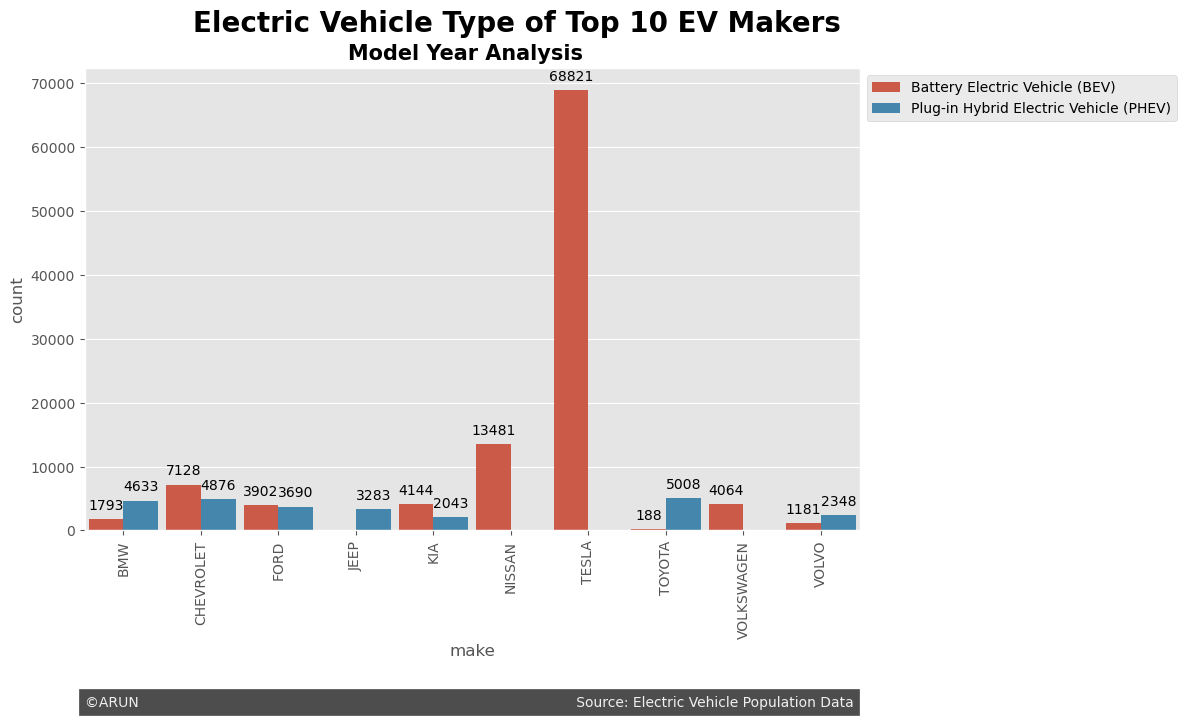

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='make', y='count', hue='electric vehicle type', data=pivot_table, ax=ax, width = 0.9)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

x_limits = ax.get_xlim()
y_limits = ax.get_ylim()
x_text = x_limits[0] + (x_limits[1] - x_limits[0]) * 0.14
y_text1 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.08 
y_text2 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.02  
bottom_y = y_limits[0] - (y_limits[1] - y_limits[0]) * 0.38

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points'
                )
    
ax.text(x=x_text, y=y_text1, s="Electric Vehicle Type of Top 10 EV Makers",
        weight='bold', size=20)
ax.text(x=x_text+2, y=y_text2, s="Model Year Analysis",
        weight='bold', size=15)
ax.text(x=x_limits[0], y=bottom_y, s='©ARUN' + ' ' * 100 + 'Source: Electric Vehicle Population Data', color='#f0f0f0',
        backgroundcolor='#4d4d4d', size=10)

plt.show()

The bar plot provides a breakdown of electric vehicle (EV) types and their respective counts across different manufacturers, offering valuable insights into the adoption of battery electric vehicles (BEVs) and plug-in hybrid electric vehicles (PHEVs) in the market.

Key observations

- BMW: BMW offers both BEVs and PHEVs, with a higher count of PHEVs compared to BEVs, indicating a significant presence in the plug-in hybrid segment.

- CHEVROLET: Chevrolet demonstrates a commitment to electrification with offerings in both BEVs and PHEVs, with a notable count of BEVs suggesting a strong foothold in the battery electric vehicle market.

- FORD: Ford also offers both BEVs and PHEVs, with relatively similar counts for both types, showcasing a balanced approach to electric vehicle development.

- JEEP: Jeep primarily offers PHEVs, indicating a focus on plug-in hybrid technology within its lineup.

- KIA: Kia shows a preference for BEVs over PHEVs, with a higher count of BEVs compared to PHEVs, suggesting a strategic emphasis on battery electric vehicles.

- NISSAN: Nissan focuses solely on BEVs, with a substantial count, reflecting a strong commitment to battery electric technology exemplified by the Nissan Leaf.

- TESLA: Tesla exclusively produces BEVs, with a significantly higher count compared to other manufacturers, reinforcing its position as a leader in the battery electric vehicle market.

- TOYOTA: Toyota offers both BEVs and PHEVs, with a higher count of PHEVs, indicating a significant presence in the plug-in hybrid segment alongside its renowned hybrid offerings.

- VOLKSWAGEN: Volkswagen demonstrates a commitment to electrification with a notable count of BEVs, showcasing its efforts to expand its electric vehicle lineup with models like the ID. series.

- VOLVO: Volvo offers both BEVs and PHEVs, with a higher count of PHEVs, showcasing a focus on plug-in hybrid technology alongside its electric vehicle offerings.

### Top Electric Utility

In [34]:
top_10_electric_utility = (ev_data_pop['electric utility']
                           .str.split("|")
                           .str[0]
                           .str.replace('(WA)', '')
                           .str.replace('-','')
                           .value_counts()).head(10)
eu = calculate_percentage(top_10_electric_utility,ev_data_pop)
create_pretty_table(eu, ['electric_utility', 'Count', 'Percentage'])

+---------------------------------+---------+------------+
|        electric_utility         |  Count  | Percentage |
+---------------------------------+---------+------------+
|     PUGET SOUND ENERGY INC      | 88942.0 |    59.2    |
| BONNEVILLE POWER ADMINISTRATION | 29025.0 |    19.3    |
|         CITY OF SEATTLE         | 27269.0 |    18.2    |
|           PACIFICORP            | 1102.0  |    0.7     |
|  MODERN ELECTRIC WATER COMPANY  |  917.0  |    0.6     |
|    PUD NO 1 OF CHELAN COUNTY    |  863.0  |    0.6     |
|    PUD NO 2 OF GRANT COUNTY     |  452.0  |    0.3     |
|           AVISTA CORP           |  323.0  |    0.2     |
|   PUD NO 1 OF DOUGLAS COUNTY    |  293.0  |    0.2     |
|         CITY OF TACOMA          |  220.0  |    0.1     |
+---------------------------------+---------+------------+


The table presents data on electric utility providers, including their counts of electric vehicle (EV) registrations and the corresponding percentages.

- PUGET SOUND ENERGY INC: Puget Sound Energy Inc leads the table with 88,942 EV registrations, representing 59.2% of the total. This indicates a significant market share for Puget Sound Energy Inc in facilitating EV charging and supporting electric mobility in the region.

- BONNEVILLE POWER ADMINISTRATION: The Bonneville Power Administration follows with 29,025 EV registrations, comprising 19.3% of the total. As a federal agency responsible for power generation and transmission, its involvement in EV infrastructure indicates a commitment to supporting sustainable transportation initiatives.

- CITY OF SEATTLE: The City of Seattle ranks third with 27,269 EV registrations, making up 18.2% of the total. This highlights the city's efforts to promote EV adoption through various initiatives, including infrastructure development and incentives.

- PACIFICORP, MODERN ELECTRIC WATER COMPANY, PUD NO 1 OF CHELAN COUNTY, PUD NO 2 OF GRANT COUNTY, AVISTA CORP, PUD NO 1 OF DOUGLAS COUNTY, CITY OF TACOMA: These utility providers contribute to the remaining registrations, each with smaller percentages reflecting their respective roles in supporting electric mobility within their service areas.

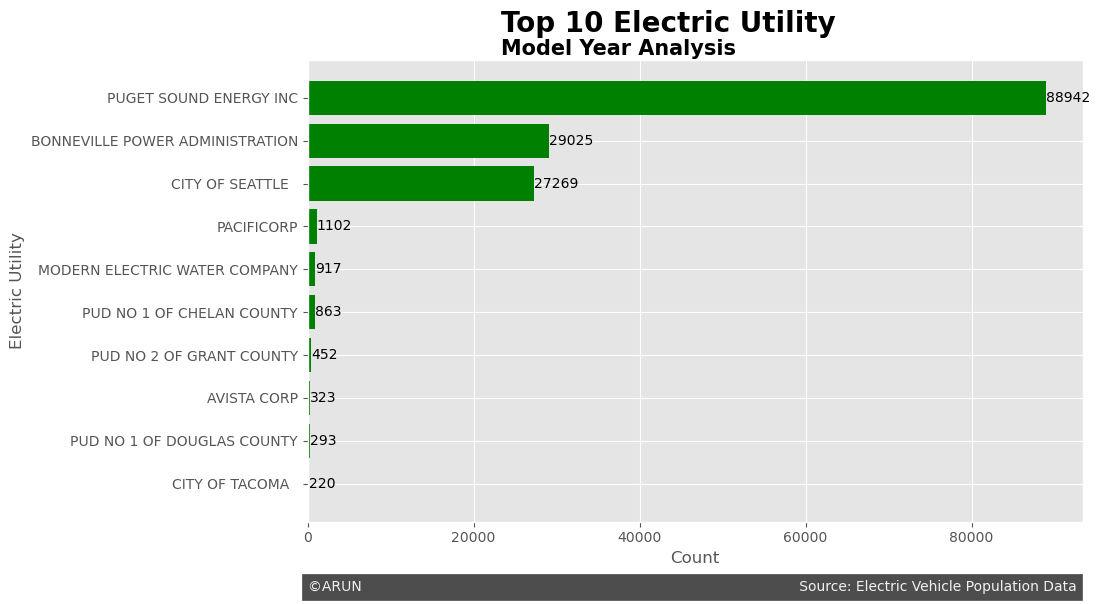

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sorted_data = top_10_electric_utility.sort_values(ascending=False)
utility = sorted_data.index
count = sorted_data.values
barh =ax.barh(utility, count, color='green') 
plt.xlabel('Count')
plt.ylabel('Electric Utility')

for bar in barh:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center', fontsize=10)
    
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

x_text = x_limits[0] + (x_limits[1] - x_limits[0]) * 0.25 
y_text1 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.15
y_text2 = y_limits[1] + (y_limits[1] - y_limits[0]) * 0.01 
bottom_y = y_limits[0] - (y_limits[1] - y_limits[0]) * 0.06 
bottom_y2 = y_limits[0] - (y_limits[1] - y_limits[0]) * 0.01 



ax.text(x=x_text, y=bottom_y, s="Top 10 Electric Utility",
        weight='bold', size=20)
ax.text(x=x_text , y=bottom_y2, s="Model Year Analysis",
        weight='bold', size=15)
ax.text(x=x_limits[0], y= y_text1, s='©ARUN' + ' ' * 100 + 'Source: Electric Vehicle Population Data', color='#f0f0f0', 
        backgroundcolor='#4d4d4d', size=10)
ax.invert_yaxis() # Invert the y-axis to have the highest count at the top
plt.show()

In [36]:
count_of_ev_in_counties = pd.DataFrame(ev_data_pop.groupby('county').size().reset_index(name = 'count'))
count_of_ev_in_counties.head()

,county,count
0,Adams,41
1,Asotin,63
2,Benton,1800
3,Chelan,863
4,Clallam,920


In [37]:
from geopy.geocoders import Nominatim

washington_counties = ["Adams", "Asotin", "Benton", "Chelan", "Clallam", "Clark", "Columbia", "Cowlitz", "Douglas", "Ferry", "Franklin", "Garfield", "Grant", "Grays Harbor", "Island", "Jefferson", "King", "Kitsap", "Kittitas", "Klickitat", "Lewis", "Lincoln", "Mason", "Okanogan", "Pacific", "Pend Oreille", "Pierce", "San Juan", "Skagit", "Skamania", "Snohomish", "Spokane", "Stevens", "Thurston", "Wahkiakum", "Walla Walla", "Whatcom", "Whitman", "Yakima"]

# Initialize geocoder
geolocator = Nominatim(user_agent="washington_counties")

# Dictionary to store county coordinates
county_coordinates = {}

# Geocode each county
for county in washington_counties:
    location = geolocator.geocode(county + " County, Washington, USA")
    if location:
        county_coordinates[county] = (location.latitude, location.longitude)

# Print county coordinates
for county, coordinates in county_coordinates.items():
    print(f"{county}: Latitude {coordinates[0]}, Longitude {coordinates[1]}")


Adams: Latitude 46.9723633, Longitude -118.5934644
Asotin: Latitude 46.1678079, Longitude -117.2045179
Benton: Latitude 46.1691702, Longitude -119.5286424
Chelan: Latitude 47.8012197, Longitude -120.6276904
Clallam: Latitude 47.9998383, Longitude -123.7373472
Clark: Latitude 45.7669047, Longitude -122.4940866
Columbia: Latitude 46.2947665, Longitude -117.9174697
Cowlitz: Latitude 46.1998625, Longitude -122.6931507
Douglas: Latitude 47.7652709, Longitude -119.6075365
Ferry: Latitude 48.4736934, Longitude -118.4834362
Franklin: Latitude 46.5654696, Longitude -118.8935483
Garfield: Latitude 46.4604687, Longitude -117.5294769
Grant: Latitude 47.119015, Longitude -119.4904332
Grays Harbor: Latitude 47.1744169, Longitude -123.8658829
Island: Latitude 48.2162669, Longitude -122.6842402
Jefferson: Latitude 47.7325289, Longitude -123.6328565
King: Latitude 47.4873376, Longitude -121.8622122
Kitsap: Latitude 47.594502, Longitude -122.6474421
Kittitas: Latitude 47.1057471, Longitude -120.5849305


In [38]:
county_df = pd.DataFrame.from_dict(county_coordinates, orient='index', columns=['Latitude', 'Longitude'])
# Reset index to make county names a column
county_df.reset_index(inplace=True)
county_df.rename(columns={'index': 'county'}, inplace=True)
county_df.head()

,county,Latitude,Longitude
0,Adams,46.972363,-118.593464
1,Asotin,46.167808,-117.204518
2,Benton,46.169170,-119.528642
3,Chelan,47.801220,-120.627690
4,Clallam,47.999838,-123.737347


In [39]:
county_df_merged = county_df.merge(count_of_ev_in_counties, on = 'county')
county_df_merged.head()

,county,Latitude,Longitude,count
0,Adams,46.972363,-118.593464,41
1,Asotin,46.167808,-117.204518,63
2,Benton,46.169170,-119.528642,1800
3,Chelan,47.801220,-120.627690,863
4,Clallam,47.999838,-123.737347,920


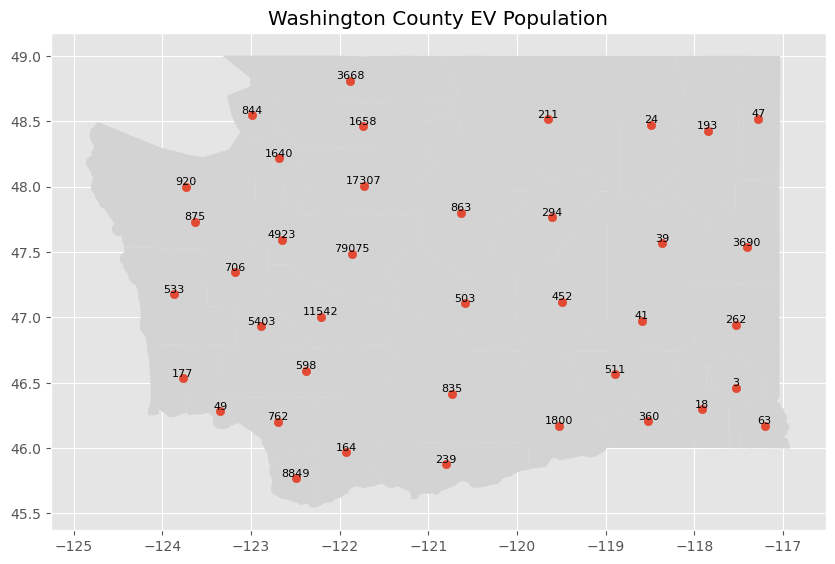

In [40]:
wa_counties = gpd.read_file('WA_County_Boundaries/WA_County_Boundaries.shp')
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(county_df_merged['Longitude'], county_df_merged['Latitude'])]
geo_df = gpd.GeoDataFrame(county_df_merged, 
                          crs = crs, 
                          geometry = geometry)
fig, ax = plt.subplots(figsize = (10,8))
wa_counties.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df['count']):
    ax.text(x, y, label, fontsize=8, ha='center', va='bottom')
ax.set_title('Washington County EV Population')
plt.show()

In [41]:
county_df_merged.sort_values(by='count', ascending=False).head()

,county,Latitude,Longitude,count
16,King,47.487338,-121.862212,79075
30,Snohomish,48.007474,-121.730488,17307
26,Pierce,47.002255,-122.211798,11542
5,Clark,45.766905,-122.494087,8849
33,Thurston,46.931998,-122.885515,5403


In [42]:
county_df_merged.sort_values(by='count', ascending=False).tail()

,county,Latitude,Longitude,count
0,Adams,46.972363,-118.593464,41
21,Lincoln,47.566459,-118.358862,39
9,Ferry,48.473693,-118.483436,24
6,Columbia,46.294767,-117.917470,18
11,Garfield,46.460469,-117.529477,3


The map offers a comprehensive overview of electric vehicle (EV) registrations across various counties in Washington state. 

- King County: King County leads the list with a substantial number of EV registrations, totaling 79,075. As the most populous county in Washington and home to major urban centers such as Seattle, Bellevue, and Redmond, King County's high number of EV registrations reflects its progressive attitude towards sustainability and environmental consciousness.

- Snohomish County: Snohomish County follows with 17,307 EV registrations. Located just north of King County, Snohomish County benefits from its proximity to the Seattle metropolitan area and likely shares similar environmental initiatives and infrastructure to support EV adoption.

- Pierce County: Pierce County ranks third with 11,542 EV registrations. Home to the city of Tacoma and other suburban areas, Pierce County's EV registrations indicate a growing interest in electric mobility within the region.

- Clark County: Clark County, situated in southwestern Washington along the Oregon border, boasts 8,849 EV registrations. Despite being less populous than counties in the Puget Sound region, Clark County's EV registrations suggest a notable presence of electric vehicles, possibly driven by environmental awareness and infrastructure development efforts.

- Thurston County, Kitsap County, Spokane County, Whatcom County, Benton County: These counties also show significant numbers of EV registrations, ranging from 3,668 to 5,403, reflecting diverse geographic regions and varying levels of urbanization and environmental consciousness across the state.

- Rural Counties: Several rural counties, such as Franklin, Kittitas, and Okanogan, also report EV registrations, albeit with smaller numbers compared to urban areas. This indicates a broader trend of EV adoption extending beyond urban centers, potentially influenced by factors such as access to charging infrastructure and environmental awareness.

## Conclusion:
The analysis of electric vehicle population data in Washington State offers valuable insights into the dynamics of EV adoption and the factors driving it. Through this project, i was aiming to contribute to the ongoing efforts to promote sustainable transportation and mitigate environmental impacts associated with traditional fossil fuel vehicles.